# Activity 1.2 : Training Neural Networks


|Hands-on Activity 2.2|Training Neural Networks|
|-|-|
|name|de guzman, aero kent|
|course code|cpe313|
|course title|advanced machine learning|
|course section|cpe32s3|
|date performed|08/01/26|
|date submitted|12/01/26|
|instructor|Engr. Neal Barton James Matira|

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [3]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [4]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
564,0,91,80,0,0,32.4,0.601,27,0
2,8,183,64,0,0,23.3,0.672,32,1
345,8,126,88,36,108,38.5,0.349,49,0
633,1,128,82,17,183,27.5,0.115,22,0
500,2,117,90,19,71,25.2,0.313,21,0


In [5]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [6]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [8]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [9]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [10]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [11]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [12]:

model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6598 - loss: 0.6600 - val_accuracy: 0.6198 - val_loss: 0.6589
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6647 - loss: 0.6621 - val_accuracy: 0.6354 - val_loss: 0.6551
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6882 - loss: 0.6386 - val_accuracy: 0.6458 - val_loss: 0.6514
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6708 - loss: 0.6493 - val_accuracy: 0.6615 - val_loss: 0.6478
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6894 - loss: 0.6405 - val_accuracy: 0.6615 - val_loss: 0.6444
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6744 - loss: 0.6421 - val_accuracy: 0.6667 - val_loss: 0.6410
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6824 - loss: 0.6422 - val_accuracy: 0.6927 - val_loss: 0.6378
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6711 - loss: 0.6398 - val_accuracy: 0.6927 - 

In [17]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.
model_1 = model

y_pred_class_nn_1 = model_1.predict(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [18]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.44324878],
       [0.6551594 ],
       [0.30380404],
       [0.20267767],
       [0.22234568],
       [0.47723404],
       [0.05338025],
       [0.23913677],
       [0.8424869 ],
       [0.2384922 ]], dtype=float32)

In [19]:
y_pred_prob_nn_1[:10]

array([[0.44324878],
       [0.6551594 ],
       [0.30380404],
       [0.20267767],
       [0.22234568],
       [0.47723404],
       [0.05338025],
       [0.23913677],
       [0.8424869 ],
       [0.2384922 ]], dtype=float32)

Create the plot_roc function

In [20]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

roc-auc is 0.823


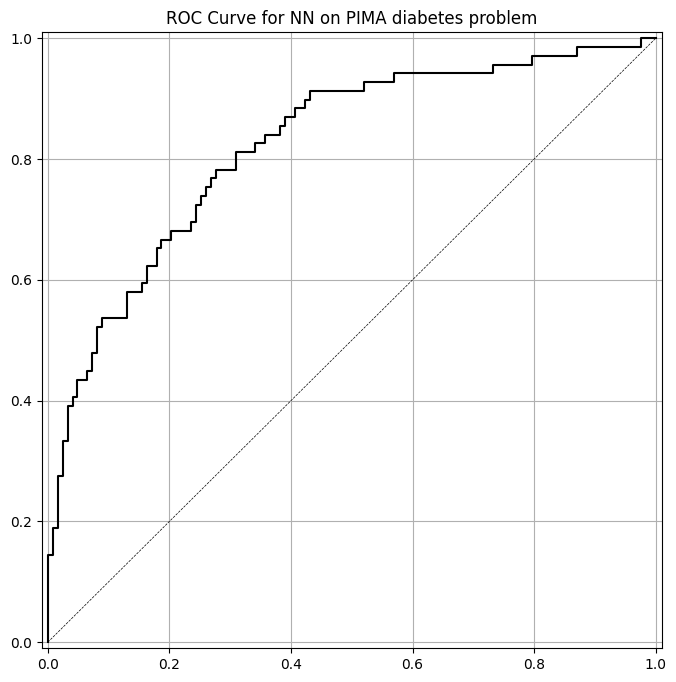

In [21]:

# print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [22]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

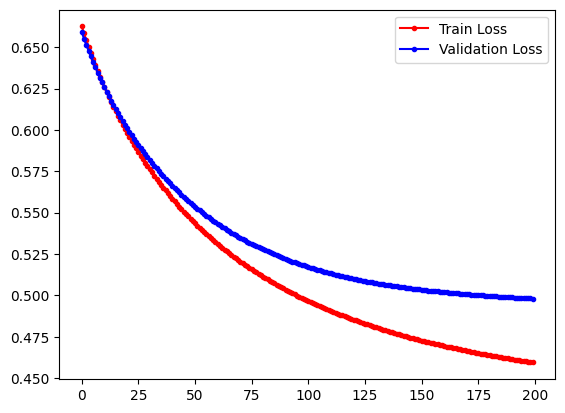

In [23]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

# **Based on the output of the graph above, it can be seen that the best choice to select would be around 25 to 50 epoch such that 75 can be a bit more acceptable while more will lead to an overfitting since the validation loss has already reach the max cap that can be attained.**

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [33]:
X_train.shape

(576, 8)

In [51]:
# Build a model with two hidden layers, each with 6 nodes
# Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_x = X_train.shape[1]

input = Input((input_x,), name="input")

x1 = Dense(6, activation = 'relu', name="hidden_layer_1")(input)
x2 = Dense(6, activation = 'relu', name="hidden_layer_2")(x1)

output = Dense(1, activation = 'sigmoid', name="output")(x2)

sup_model = Model(inputs = input, outputs = output, name="supplementary_model")
sup_model.compile(SGD(learning_rate = 0.003), loss="binary_crossentropy", metrics=["accuracy"])

## displaying the model paramters
sup_model.summary()

Model: "supplementary_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Use a learning rate of .003 and train for 1500 epochs

history = sup_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500)

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.5241 - loss: 2.1262 - val_accuracy: 0.6250 - val_loss: 0.7755
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5554 - loss: 0.8489 - val_accuracy: 0.6458 - val_loss: 0.9395
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5743 - loss: 0.7644 - val_accuracy: 0.6510 - val_loss: 0.7173
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5742 - loss: 0.7246 - val_accuracy: 0.6562 - val_loss: 0.7461
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6216 - loss: 0.6980 - val_accuracy: 0.6562 - val_loss: 0.7359
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6122 - loss: 0.7078 - val_accuracy: 0.3594 - val_loss: 0.7468
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5351 - loss: 0.7084 - val_accuracy: 0.6510 - val_loss: 0.6905
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6241 - loss: 0.6951 - val_accuracy: 0

In [46]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

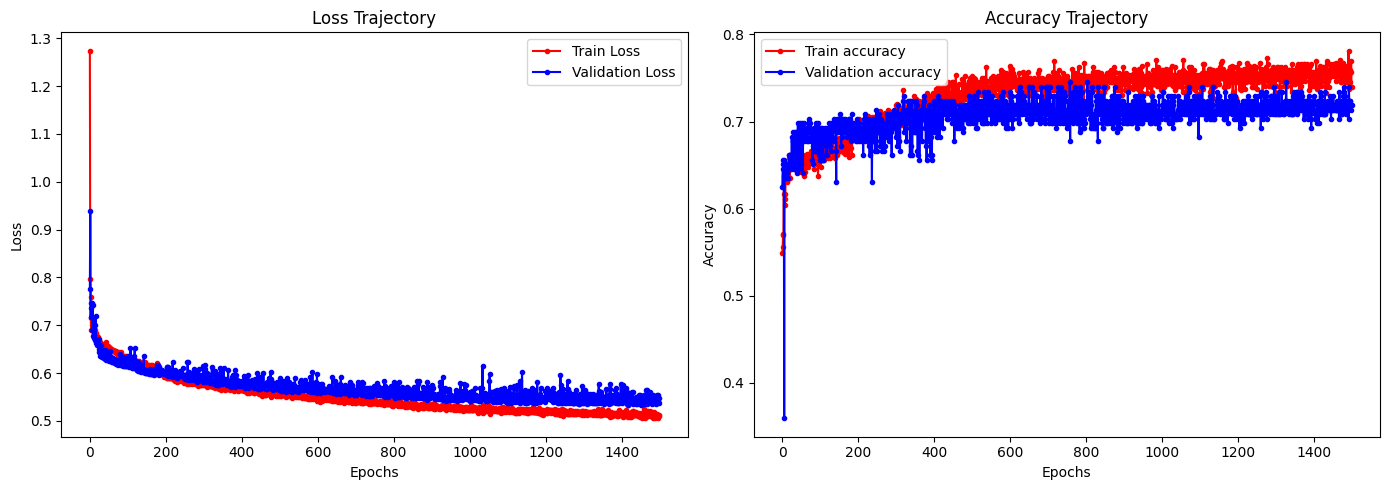

In [49]:
# Graph the trajectory of the loss functions, accuracy on both train and test set
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(history.history["loss"], 'r', marker='.', label="Train Loss")
ax[0].plot(history.history["val_loss"], 'b', marker='.', label="Validation Loss")
ax[0].set_title("Loss Trajectory")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"], 'r', marker='.', label="Train accuracy")
ax[1].plot(history.history["val_accuracy"], 'b', marker='.', label="Validation accuracy")
ax[1].set_title("Accuracy Trajectory")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


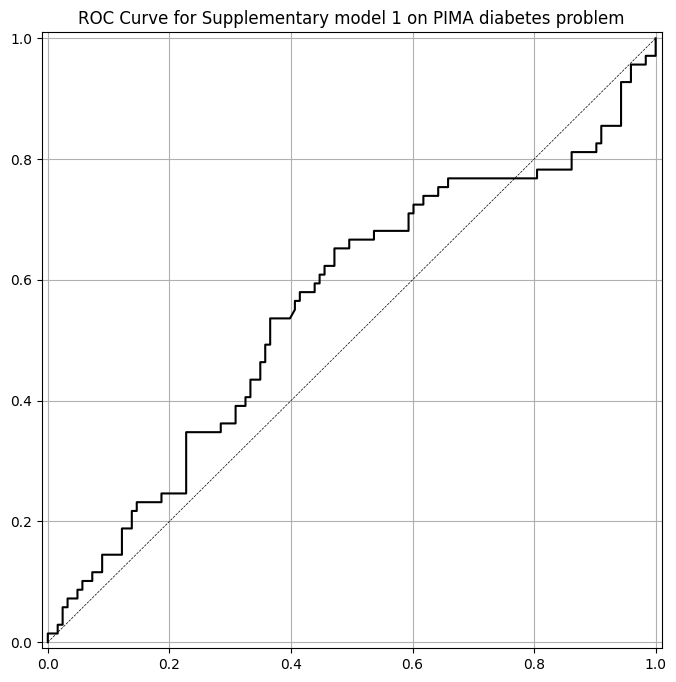

In [50]:
# Plot the roc curve for the predictions
y_pred = sup_model.predict(X_test_norm) # the value of the X_test_norm
plot_roc(y_test, y_pred, 'Supplementary model 1')          # is the same as in the procedure

In [78]:
# Use different learning rates, numbers of epochs, and network structures.
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend

backend.clear_session()

layer_input = Input((input_x,), name="layer_in")

layer_x1 = Dense(16, activation = 'leaky_relu', name="layer_1")(layer_input)
layer_x2 = Dense(32, activation = 'leaky_relu', name="layer_2")(layer_x1)
layer_x3 = Dense(32, activation = 'leaky_relu', name="layer_3")(layer_x2)
layer_x4 = Dense(16, activation = 'leaky_relu', name="layer_4")(layer_x3)

layer_output = Dense(1, activation = 'sigmoid', name="layer_out")(layer_x4)

dif_sup_model = Model(inputs = layer_input, outputs = layer_output, name="dif_sup_model")
dif_sup_model.compile(optimizer = Adam(), loss="binary_crossentropy", metrics=["accuracy"])

## displaying the model paramters
dif_sup_model.summary()

Model: "dif_sup_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_in (InputLayer)           │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_out (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,289 (8.94 KB)

 Trainable params: 2,289 (8.94 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
# used 0.001 learning rate instead + 1000 epochs
dif_sup_hist = dif_sup_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.4926 - loss: 3.4213 - val_accuracy: 0.6562 - val_loss: 0.8266
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5339 - loss: 0.8517 - val_accuracy: 0.5938 - val_loss: 0.8764
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6622 - loss: 0.6670 - val_accuracy: 0.6042 - val_loss: 0.6916
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6679 - loss: 0.6405 - val_accuracy: 0.5938 - val_loss: 0.6745
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6843 - loss: 0.6216 - val_accuracy: 0.6250 - val_loss: 0.6513
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6952 - loss: 0.6176 - val_accuracy: 0.6250 - val_loss: 0.6997
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7146 - loss: 0.6035 - val_accuracy: 0.6562 - val_loss: 0.6650
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6563 - loss: 0.5991 - val_accuracy: 0

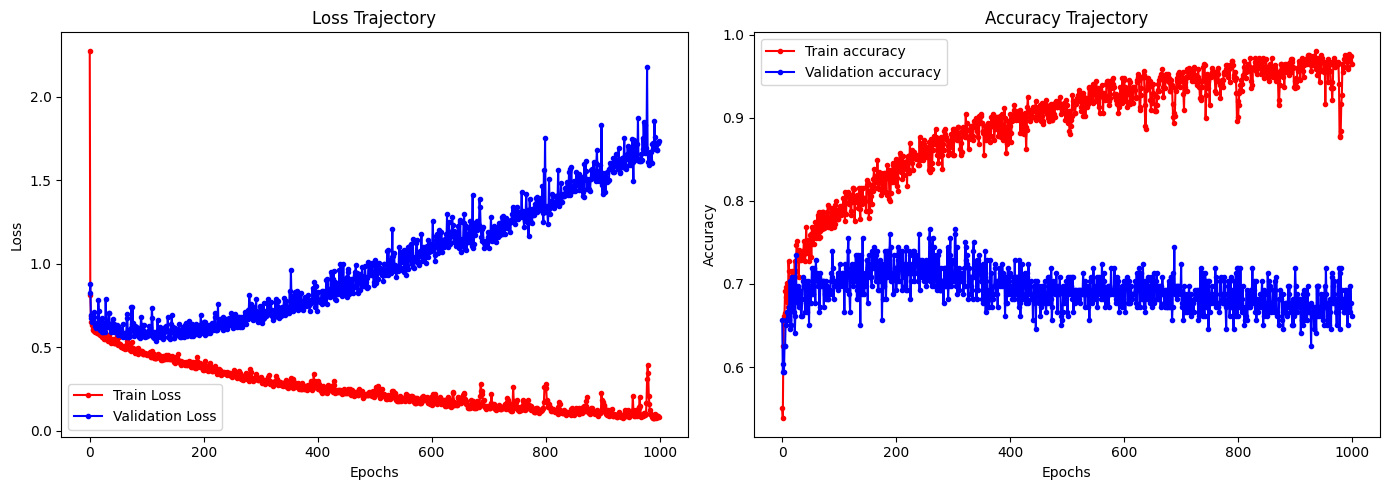

In [84]:
# Graph the trajectory of the loss functions, accuracy on both train and test set
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(dif_sup_hist.history["loss"], 'r', marker='.', label="Train Loss")
ax[0].plot(dif_sup_hist.history["val_loss"], 'b', marker='.', label="Validation Loss")
ax[0].set_title("Loss Trajectory")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(dif_sup_hist.history["accuracy"], 'r', marker='.', label="Train accuracy")
ax[1].plot(dif_sup_hist.history["val_accuracy"], 'b', marker='.', label="Validation accuracy")
ax[1].set_title("Accuracy Trajectory")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


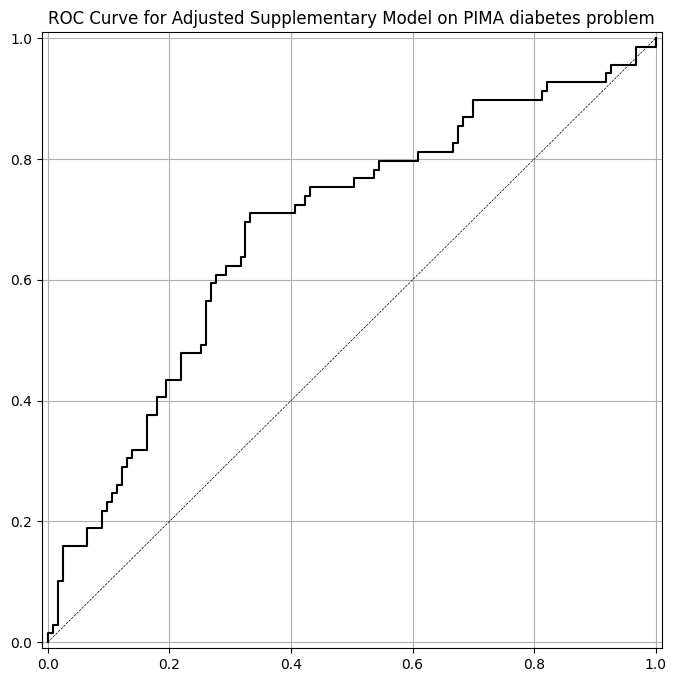

In [85]:
y_pred_2 = dif_sup_model.predict(X_test_norm)              # the value of the X_test_norm
plot_roc(y_test, y_pred_2, 'Adjusted Supplementary Model') # is the same as in the procedure

In [ ]:
# Interpret your result
# 2 layers with fewer neurons as well as a network structure that used a
# relu+sigmoid provided a more stable output albeit has not met a satisfactory
# 95% accuracy while the usage of an altered structure that used more layers and
# neurons in combination with a leaky_relu activation function provided an
# overfitting outcome but achieved the 95% satisfactory goal. Looking at this,
# the initial combination provided a better result that is needed to only be
# changed in terms of the amount of neurons or layers which can possibly push it
# towards the 90%+ mark.

#### Conclusion

#type your answer here

**To conclude the following activity it was now about the Trainign of Neural Networks that differs from the previous one wherein it now builds an Artifical Neural Network using dense layers in comparison of manually calculating the feed forward and back propagation using sample data. In here the way this networks are built are reiterated once more such that the key use of the dense() layer was used which is the one that constructs the layers of the neural network such as how the neurons will be calculated based on the activation function as well as the amount of neurons per layers. Additionally it has also demonstrated how to evaluate and plot the model using the training and validation of them which is seen both in the procedures and supplementary such that each fit of the model will return a history which contains the needed table such as the accuracy and loss for both accuracy and loss that can be directly be plotted by simply calling it in a history().**